# SMART HOME ENERGY MANAGEMENT SYSTEM 

### Problem Statement

A Smart Home Energy Management System(SHEMS) is a system that helps consumers save on energy used hence cost.

As for my system, it should predict energy consumed depending on home attributes such as status of electronic appliances, weather and occupancy amongst more others. This system should help the consumer identify which devices or behaviours actually contribute to high energy consumption. This helps them to know which devices to keep in the house and which not to keep, and which are the correct energy efficient behaviours.

The main device used for Smart Homes are Smart Meters which send real time energy readings to the consumer and supplier. Other Smart Homes use Internet of Things such that you can use your Smartphone to turn on and off lights and electronic appliances in the house.


### Problem Statement

To make a web application that predicts energy consumption looking at home appliances status, weather, occupancy, day of week and holidays amongst other attributes.

### Objectives 

To find a good dataset for energy consumption prediction

To clean and explore the dataset to get hidden patterns

To choose the target and independent variables

To train the dataset on a specific machine learning model

To predict energy consumption

To identify hidden insights on energy consumption

Recommend energy efficient behaviours according to the insights found

To deploy the model online for use by any electricity consumer


### Data Loading,Cleaning and Understanding

In [160]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

import pickle


In [161]:
# load dataset
data=pd.read_csv('Energy_consumption.csv')

In [162]:
# to get the first 5 rows of the dataset
data.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


#### Explanation of Columns/Domain Knowledge

In [163]:
#checking the column names
data.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

Timestamp:  date and time records, with one hour difference from 1st Jan 2022(12:00am) to 11th Feb 2022(3:00pm) in the format date time.

Temperature: temperature values in degrees celsious

Humidity: humidity levels as a percentage

SquareFootage: size of the house environment in square feet measurements

Occupancy: number of occupants

HVACUsage: HVAC status (On or Off)

LightingUsage: Lighting status (On or Off)

RenewableEnergy: contributed renewable energy as a percentage

DayOfWeek: day of the week(Sunday to Saturday

Holiday: categorical variable stating whether the day is a holiday (Yes or No)

EnergyConsumption: energy consumed in a day in kilo Watts


In [164]:
# get the rows and columns respectively
rows, columns = data.shape
print(f"This dataset has {rows} rows and {columns} columns")

This dataset has 1000 rows and 11 columns


In [165]:
# infomation about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [166]:
#checking for null values
data.isnull().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [167]:
#checking for total duplicates in the dataset
data.duplicated().sum()

0

In [168]:
#checking for the total unique data per variable
data.nunique()

Timestamp            1000
Temperature          1000
Humidity             1000
SquareFootage        1000
Occupancy              10
HVACUsage               2
LightingUsage           2
RenewableEnergy      1000
DayOfWeek               7
Holiday                 2
EnergyConsumption    1000
dtype: int64

In [169]:
# description of the dataset
data.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


##### Temperature

The least temperature was 20.00 degrees Celsius while the highest temperature was 29.999 degrees Celsius.

##### Humidity

The least humidity was at 30.02% while the highest was 59.97%.

##### Square Footage

The smallest house environment was 1000.51 square feet while the highest was 1999.98 square feet.

##### Occupancy

The number of least occupants was 0  and highest  9.

##### Renewable Energy

The least percentage of renewable energy used was 0.006642% while the highest was 29.97%.

##### Energy Consumption

The least energy consumed in a day was 53.26kW  while the highest was 99.20kW.


In [170]:
# Dropping the not needed data
data.drop(['Timestamp','RenewableEnergy'],axis=1,inplace=True)

In [171]:
# Checking updates on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        1000 non-null   float64
 1   Humidity           1000 non-null   float64
 2   SquareFootage      1000 non-null   float64
 3   Occupancy          1000 non-null   int64  
 4   HVACUsage          1000 non-null   object 
 5   LightingUsage      1000 non-null   object 
 6   DayOfWeek          1000 non-null   object 
 7   Holiday            1000 non-null   object 
 8   EnergyConsumption  1000 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


## Exploratory Data Analysis

### Univariate Analysis

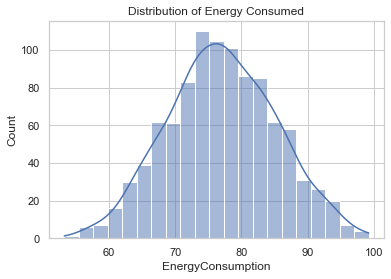

In [172]:
# plotting a histogram that shows distribution of energy consumed
sns.histplot(data['EnergyConsumption'], kde=True)
plt.xlabel('EnergyConsumption')
plt.ylabel('Count')
plt.title('Distribution of Energy Consumed')
plt.show()

this has a normal distribution

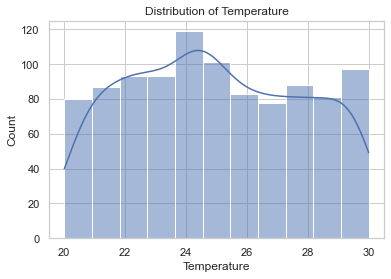

In [173]:
#Histogram that shows distribution of temperature
sns.histplot(data['Temperature'] ,kde=True)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Distribution of Temperature')
plt.show()


it has skewed to the left

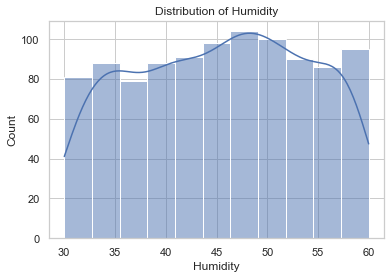

In [174]:
#histogram that shows distribution of humidity
sns.histplot(data['Humidity'], kde=True)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Distribution of Humidity')
plt.show()



it has skewed to the right

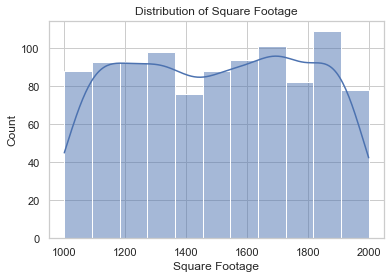

In [175]:
# Histogram thst shows distribution of the footage of the houses
sns.histplot(data['SquareFootage'] ,kde=True)
plt.xlabel('Square Footage')
plt.ylabel('Count')
plt.title('Distribution of Square Footage')
plt.show()

has two classes(1000 to 1300 and 1500 to 2000)

In [176]:
# function for ploting count plots labeled with the count value
import seaborn as sns
import matplotlib.pyplot as plt

def plot_count_with_annotations(data, x):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=x, data=data)
    plt.title('Distribution of {}'.format(x.lower()))

    # Adding count values on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

    plt.show()

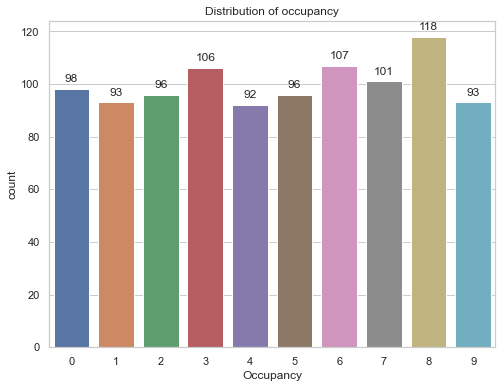

In [177]:
#Distribution of Occupancy
plot_count_with_annotations(data,'Occupancy')


the distribution is quite constant , 8 having the highest count and 4 having the lowest

In [178]:
# Mapping Categorical values to numerical
data['HVACUsage']=data['HVACUsage'].map({'Off':0 , 'On':1})
data['LightingUsage']=data['LightingUsage'].map({'Off':0 , 'On':1})
data['DayOfWeek']=data['DayOfWeek'].map({'Sunday':0 , 'Monday':1 , 'Tuesday':2 , 'Wednesday':3, 'Thursday':4 , 'Friday':5,'Saturday':6})
data['Holiday']=data['Holiday'].map({'No':0 , 'Yes':1})

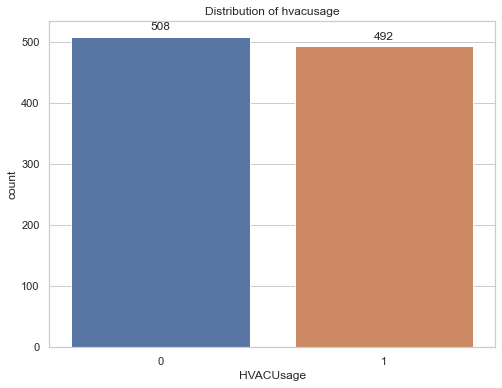

In [179]:
#Distribution of HVAC Usage
plot_count_with_annotations(data,'HVACUsage')

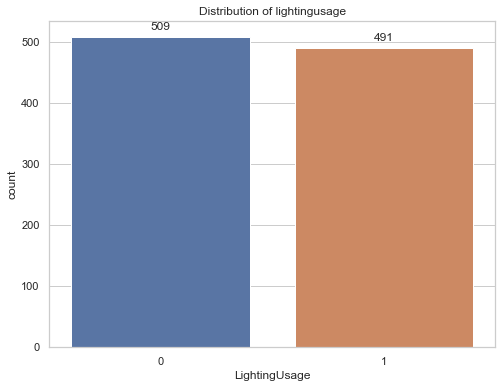

In [180]:
#Distribution of Lighting Usage
plot_count_with_annotations(data,'LightingUsage')


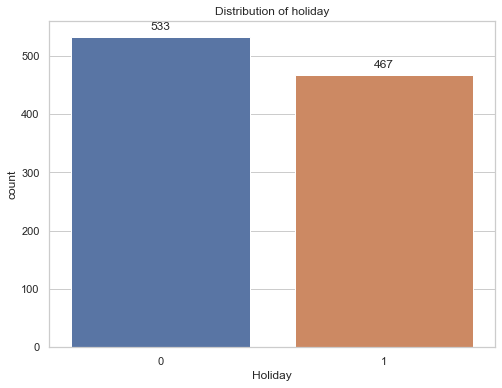

In [181]:
#Distribution of Holiday
plot_count_with_annotations(data,'Holiday')


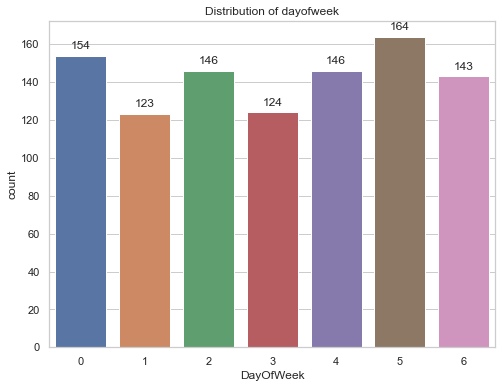

In [182]:
#Distribution of Days Of the Week
plot_count_with_annotations(data,'DayOfWeek')


### Bivariate Analysis

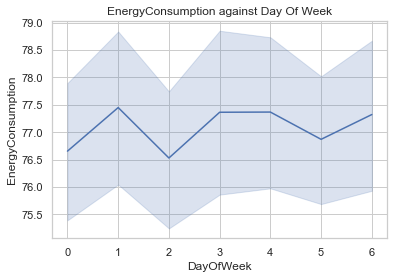

In [183]:
# Line plot of EnergyConsumption against Day Of Week
sns.lineplot(data=data,x='DayOfWeek', y= 'EnergyConsumption')
plt.xlabel('DayOfWeek')
plt.ylabel('EnergyConsumption')
plt.title('EnergyConsumption against Day Of Week')
plt.show()

Generally the plot is fairly constant to mean Day of week doesn’t affect much in high energy consumption.

Though looking at individual days off peak energy consumption days can be seen, these are Sunday, Tuesday and Friday.

Peak days are Monday, Wednesday, Thursday and Saturday.


In [184]:
#Function for plotting features against Energy Consumption
def plot_energy_consumption(data,x):
    sns.boxplot(data=data, x=x, y='EnergyConsumption')
    plt.title('Energy Consumption against {}'.format(x.lower()))
    plt.show()

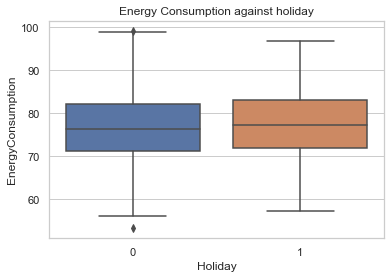

In [185]:
#Bar plot of EnergyConsumption against Holiday
plot_energy_consumption(data,'Holiday')

Holiday contributes little  to energy consumed .

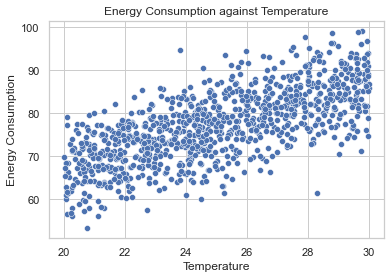

In [186]:
#Scatter Plot of Energy Consumption against Temperature
sns.scatterplot(data=data,x='Temperature', y= 'EnergyConsumption')
plt.xlabel('Temperature')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption against Temperature')
plt.show()

The plot is linear to mean temperature is the main contributor to high energy consumption. The higher the temperature the higher the energy consumed.

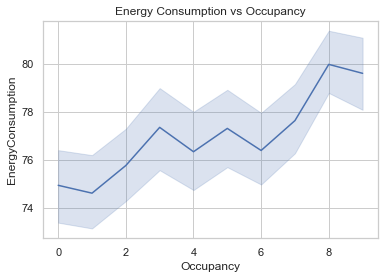

In [187]:
#Lineplot of Energy Consumption vs Occupancy
sns.lineplot(data=data,x='Occupancy', y= 'EnergyConsumption')
plt.xlabel('Occupancy')
plt.ylabel('EnergyConsumption')
plt.title('Energy Consumption vs Occupancy')
plt.show()

The plot is quite linear to mean the higher the number of people in the house the higher the energy consumed.

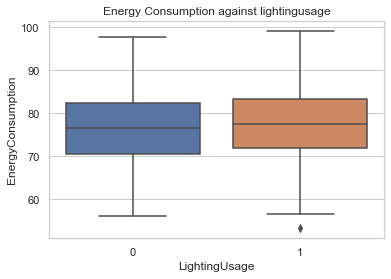

In [188]:
# Bar plot of EnergyConsumption against Lighting Usage
plot_energy_consumption(data,'LightingUsage')

Lights being On has a small significance to high energy consumption

There is still energy being consumed by the light bulbs while the lights are off.

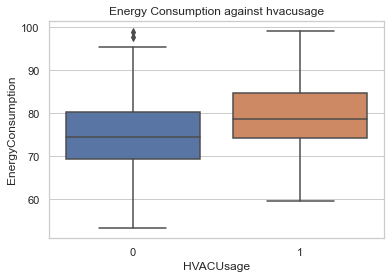

In [189]:
# Bar plot of EnergyConsumption against HVAC Usage
plot_energy_consumption(data,'HVACUsage')

HVAC being On has a quite good significance to high energy cosumption.

There is still energy being consumed by the HVAC while the appliance is off.

### Multivariate Analysis

In [190]:
#Getting correlation between dataset
numericals=data.select_dtypes(include=['float64','int64'])
nm=numericals.corr()

Text(0.5, 1.0, 'Heatmap')

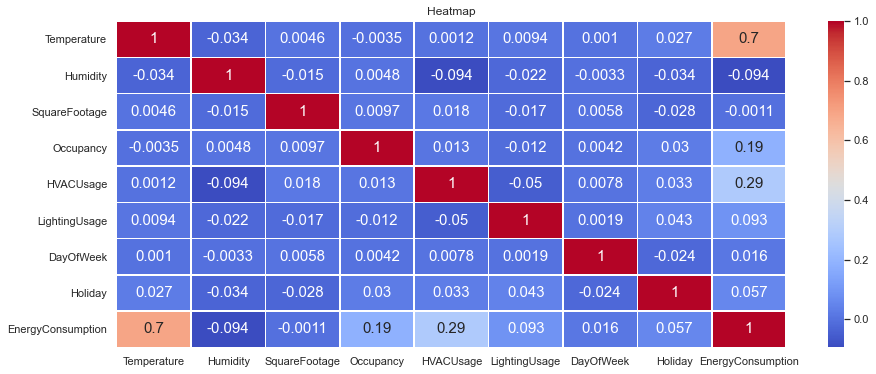

In [191]:
#Heatmap
fig, ax = plt.subplots(figsize=(15,6))

sns.heatmap(nm,annot=True,linewidths=0.5,cmap='coolwarm', annot_kws={'size': 15})
plt.title('Heatmap')

Temperature contributes highest to energy consumption followed by HVACUsage and Occupancy,then Humidity and Lighting Usage, then Holiday then day of week and finally square footage which has the least contribution to high energy consumption.

Humidity and square footage have an inverse relation with energy consumed while the others have direct proportionality. This means that increase on one variable leads to a decrease on the other, while for direct proportionality increase in one variable leads to increase in the other variable.

Temperature is inversely proportional to humidity as well.

Occupancy and holiday have some bit of relation.


<function matplotlib.pyplot.show(close=None, block=None)>

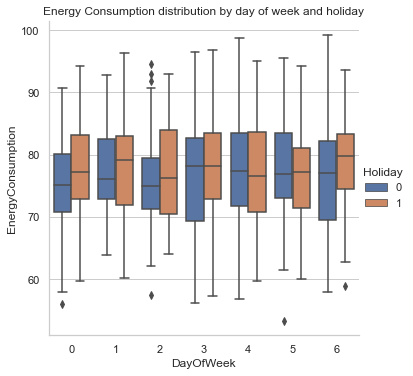

In [192]:
# Energy Consumption distribution by day of week and holiday
sns.catplot(x='DayOfWeek',hue='Holiday',y='EnergyConsumption',kind='box',data=data)
plt.title('Energy Consumption distribution by day of week and holiday')
plt.show

Holiday does contribute to a higher energy consumption.

## Machine Learning Models

In [193]:
#Sepating features/predictor and target variables
X=data.drop(['Humidity','SquareFootage','DayOfWeek','Holiday','EnergyConsumption'],axis=1)
y=data['EnergyConsumption']

#split the dataset for training and testing
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20,random_state=0)

### Linear Regression

In [194]:
#initializing and training the model
linreg=LinearRegression()
linreg.fit(X_train,y_train)

# make prediction on the test dataset
y_pred_1=linreg.predict(X_test)

#checking for error and accuracy
mse = mean_squared_error(y_test,y_pred_1)
rmse = mse ** 0.5
mn=77.055873
rmspe=(rmse/mn*100)
accur=100-rmspe

# Check for overfitting
train_score_1 = linreg.score(X_train, y_train)
test_score_1= linreg.score(X_test, y_test)

print("RMSE:", rmse)
print("Training R^2:", train_score_1)
print("Testing R^2:", test_score_1)
print(f"Accuracy:{accur}%")





RMSE: 4.940368063825338
Training R^2: 0.6148585188792925
Testing R^2: 0.6056425545990083
Accuracy:93.58858984853065%


it has no overfitting
the accuracy of the model is quite high

### Lasso Regression

In [195]:
#initializing and training the model
lasso_model=Lasso(alpha=0.2)
lasso_model.fit(X_train,y_train)

#make predictions on the test dataset
lasso_predictions=lasso_model.predict(X_test)

#checking for error and accuracy
mse_2 = mean_squared_error(y_test,lasso_predictions)
rmse_2 = mse_2 ** 0.5
mn=77.055873
rmspe_2=(rmse_2/mn*100)
accur_2=100-rmspe_2

# Check for overfitting
train_score_2 = lasso_model.score(X_train, y_train)
test_score_2= lasso_model.score(X_test, y_test)

print("RMSE", rmse_2)
print("Training R^2:", train_score_2)
print("Testing R^2:", test_score_2)
print(f"Accuracy:{accur_2}%")

RMSE 4.935721280428014
Training R^2: 0.6147875532189655
Testing R^2: 0.606384050701323
Accuracy:93.59462025635864%


it has no overfitting
the accuracy of the model is quite high

### Support Vector Regression

In [196]:
# Initializing and training the SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
# Making prediction on the test dataset
svr_pred = svr_model.predict(X_test)
#checking for error and accuracy
mse_3 = mean_squared_error(y_test,svr_pred)
rmse_3 = mse_3 ** 0.5
mn=77.055873
rmspe_3=(rmse_3/mn*100)
accur_3=100-rmspe_3
# Check for overfitting
train_score_3 = svr_model.score(X_train, y_train)
test_score_3= svr_model.score(X_test, y_test)

print("RMSE:", rmse_3)
print("Training R^2:", train_score_3)
print("Testing R^2:", test_score_3)
print(f"Accuracy:{accur_3}%")

RMSE: 4.999726102699097
Training R^2: 0.6121085677647663
Testing R^2: 0.5961092937591798
Accuracy:93.51155738291473%


it has no overfitting
the accuracy of the model is quite high

### Chosen Model for deployment

Lasso is the best performing model with the highest accuracy of 93.59%.

Advantages

One of the main advantages of Lasso Regression is its ability to perform feature selection. By setting some coefficients to zero, it can automatically identify and eliminate irrelevant features, which can help to reduce the complexity of the model and improve its interpretability. Additionally, Lasso Regression is computationally efficient and can handle a large number of features, which makes it suitable for high-dimensional datasets.

Disadvantages

However, Lasso Regression also has some limitations. One of the main disadvantages is that it is not well-suited for datasets with correlated features. In such cases, Lasso Regression tends to arbitrarily select one feature over the others, which can lead to biased and unstable results. Additionally, the choice of the regularization parameter α can be challenging, and it may require cross-validation to determine the optimal value.

In [197]:
# training the model
lasso_model=Lasso(alpha=0.2)
lasso_model.fit(X_train,y_train)

# Pickle the model for deployment

with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(lasso_model, file)
with open('lasso_model.pkl', 'rb') as file:
    loaded_file_2=pickle.load(file)



## Insights and Recommendations

### Insights

Temperature is the biggest contributor to high emergy consumption.When temperatures rise, people tend to use more energy to cool their homes or offices using air conditioning systems. This increased demand for cooling puts a strain on the power grid, leading to higher energy consumption overall. Additionally, higher temperatures can affect the efficiency of some appliances, causing them to consume more energy to maintain the same level of performance.

Even when appliances are turned off, many of them still consume a small amount of energy in standby mode. This is often referred to as standby power or phantom load. Appliances like TVs, computers,HV Air Conditioners and chargers may continue to draw power to maintain features like clock displays, remote control sensors, or to be ready for instant activation. Additionally, some appliances have transformers or power supplies that draw a small amount of electricity even when the device is not in use. These standby loads can contribute to energy consumption even when appliances appear to be off.

Energy consumption tend to be higher on holidays due to a higher occupancy.When most people are around the house electrical appliances are turned on.For example Air Conditioners for cooling,Television sets,lights,computers,charging smartphones etc.

On square footage of the environment,I expected it to contribute to energy consumption but it did not.This could be due to the other factors contributing more like occupancy or the status of electronic appliances.

On looking at weekends,more energy was consumed on Saturday and less on Sunday.This could be due to occupancy as well.



### Recommendations

Install Solar Panels. Consider investing in solar panels to generate your own renewable energy and reduce reliance on the grid

Unplug Unused Devices. Even when turned off, many electronics still draw power. Unplug chargers, appliances, and devices when they're not in use.

Switch to energy saving LED light globes.LED bulbs consume far lesser energy than incandescent or fluorescent bulbs and last much longer.

Utilize Natural Light. Open curtains and blinds during the day to take advantage of natural light and reduce the need for artificial lighting.

Considering going out on holiday vacations.With no one in the house and appliances switched off/unplugged, definitely energy consumption will be lower.

Educate Household Members. Encourage everyone in the household to be mindful of energy usage and adopt energy-saving habits, such as turning off lights when leaving a room and using appliances efficiently.







